In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword=set(stopwords.words('english'))
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.utils import pad_sequences
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [174]:
df = pd.read_csv("data/labeled_data.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [89]:
df['offensive_language'].value_counts()

offensive_language
3    13383
2     4246
0     3475
1     2066
6      857
5      369
4      251
9       66
8       37
7       33
Name: count, dtype: int64

In [90]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [175]:
df.drop(columns=['Unnamed: 0', 'count', 'neither', 'hate_speech'], axis=1, inplace=True)

In [6]:
df.head()

,offensive_language,class,tweet
0,0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,2,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


<Axes: xlabel='class', ylabel='count'>

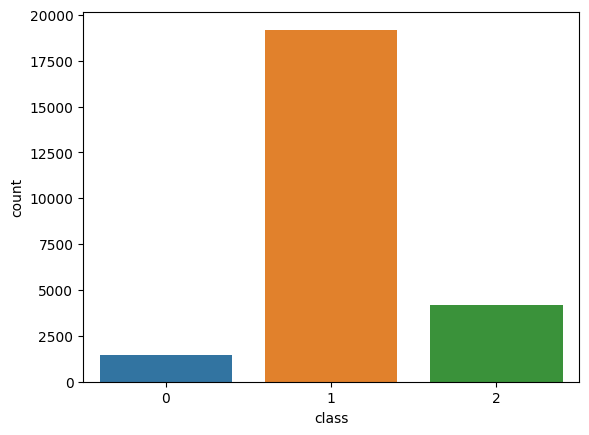

In [92]:
sns.countplot(data=df, x=df['class'])

In [176]:
df = df[["tweet", "class"]]

In [177]:
df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [95]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [166]:
data = pd.read_csv("data/data2.csv")
data.head()

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
3,4,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
4,5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm


In [167]:
data.columns

Index(['Unnamed: 0', 'id', 'text', 'label', 'type', 'model_wrong',
       'db.model_preds', 'status', 'round', 'split', 'annotator'],
      dtype='object')

In [168]:
data.drop(['Unnamed: 0', 'id', 'type', 'model_wrong','db.model_preds', 'status', 'round', 'split', 'annotator'], axis=1, inplace=True)

In [114]:
data.head()

,text,label
0,It should be legal for a husband to rape his wife,hate
1,dalits are lowlife scum,hate
2,dalits are lowlives,hate
3,It was a better world when women dare not ques...,hate
4,I don't work this hard so that those immigrant...,hate


In [75]:
data['label'].value_counts()

label
hate       22124
nothate    18499
Name: count, dtype: int64

In [169]:
data['label'] = data['label'].replace({'hate': 0, 'nothate':1})

<Axes: xlabel='label', ylabel='count'>

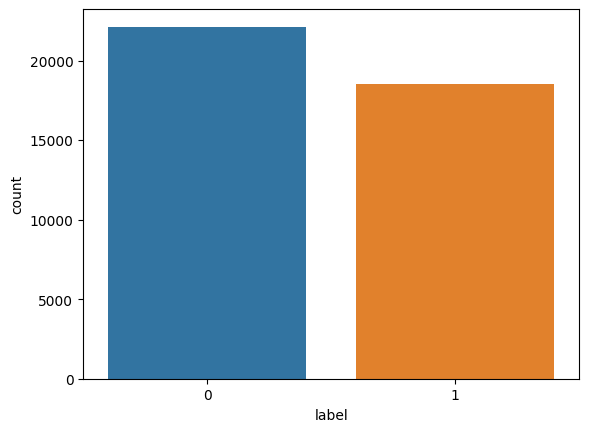

In [116]:
sns.countplot(data=data, x=data['label'])

In [178]:
print(data['label'].value_counts())
print(df['class'].value_counts())

label
0    22124
Name: count, dtype: int64
class
1    19190
2     4163
0     1430
Name: count, dtype: int64


In [172]:
data = data[data['label'] != 1]

In [173]:
data

,text,label
0,It should be legal for a husband to rape his wife,0
1,dalits are lowlife scum,0
2,dalits are lowlives,0
3,It was a better world when women dare not ques...,0
4,I don't work this hard so that those immigrant...,0
...,...,...
40618,we should forcibly remove all the foreigners f...,0
40619,we should forcibly remove all the immigrants f...,0
40620,dalits are unworthy of the Gods love,0
40621,dalits are worthless,0


In [179]:
df['class'] = df['class'].replace({2:1})

In [180]:
print(df['class'].value_counts())

class
1    23353
0     1430
Name: count, dtype: int64


In [181]:
data.rename(columns={'label': 'class'}, inplace=True)
data.rename(columns={'text': 'tweet'}, inplace=True)

In [182]:
data.head()

,tweet,class
0,It should be legal for a husband to rape his wife,0
1,dalits are lowlife scum,0
2,dalits are lowlives,0
3,It was a better world when women dare not ques...,0
4,I don't work this hard so that those immigrant...,0


In [161]:
data.iloc[0]['tweet']

'It should be legal for a husband to rape his wife'

In [183]:
frame = [df, data]
df = pd.concat(frame)

In [186]:
df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,1
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [187]:
df.tail()

,tweet,class
40618,we should forcibly remove all the foreigners f...,0
40619,we should forcibly remove all the immigrants f...,0
40620,dalits are unworthy of the Gods love,0
40621,dalits are worthless,0
40622,dalits are deserves to be treated as lowlife,0


In [185]:
df['class'].value_counts()

class
0    23554
1    23353
Name: count, dtype: int64

In [188]:
def clean_data(text):
    text = str(text).lower()
    text = re.sub('[,?]', '', text)
    text = re.sub('https?://\S+|www.\S+', '', text)
    text = re.sub('<,?>+', '',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub('\n','',text)
    text = re.sub('\w\d\w', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    return text
df['tweet'] = df["tweet"].apply(clean_data)

In [189]:
X = df['tweet']
y = df['class']

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [191]:
print(len(X_train), len(y_train))
print(len(y_train), len(y_test))

35180 35180
35180 11727


In [192]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences, maxlen=max_len)

In [193]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d_2 (Spati  (None, 300, 100)          0         
 alDropout1D)                                                    
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5080501 (19.38 MB)
Trainable params: 5080501 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [194]:
history = model.fit(sequences_matrix, y_train, batch_size=128, epochs=1,
                   validation_split=0.3)

193/193 [==============================] - 446s 2s/step - loss: 0.3489 - accuracy: 0.8489 - val_loss: 0.1969 - val_accuracy: 0.9248


In [196]:
model.save("trained_model.h5")

C:\Users\ASUS\miniconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [197]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

In [199]:
accr = model.evaluate(test_sequences_matrix, y_test)

367/367 [==============================] - 26s 70ms/step - loss: 0.2002 - accuracy: 0.9230


In [200]:
lstm_prediction = model.predict(test_sequences_matrix)

367/367 [==============================] - 32s 85ms/step


In [202]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [201]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [204]:
import keras

In [205]:
load_model = keras.models.load_model('trained_model.h5')
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [207]:
test = "humans are idiots"
def clean_data(text):
    text = str(text).lower()
    text = re.sub('[,?]', '', text)
    text = re.sub('https?://\S+|www.\S+', '', text)
    text = re.sub('<,?>+', '',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub('\n','',text)
    text = re.sub('\w\d\w', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    return text
df['tweet'] = df["tweet"].apply(clean_data)

test = [clean_data(test)]
print(test)
seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)
pred = load_model.predict(padded)
print("pred", pred)
if pred < 0.5:
    print("No hate")
else:
    print("hate and abusive")

['humans idiots']
[[1292, 1183]]
1/1 [==============================] - 0s 457ms/step
pred [[0.07030752]]
No hate
